<a href="https://colab.research.google.com/github/NiteshkumarJha/Data-Science-Capstone/blob/master/Code/Microsoft_Data_Science_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Microsoft Capstone : Data Science**

## **DAT102x: Predicting Mortgage Rates From Government Data**

# **1. Introduction**


# **2. Getting Started**


In [1]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [0]:
# Setting the path
import os
path = "/content/gdrive/My Drive/Colab Notebooks (1)/Microsoft_Capstone"
os.chdir(path)

In [0]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Importing the dataset
Train = pd.read_csv("./Input/train_values.csv")
Train_labels = pd.read_csv("./Input/train_labels_abiUmgM.csv")
Test = pd.read_csv("./Input/test_values.csv")
Sample_submission = pd.read_csv("./Input/submission_format_22TpNFD.csv")

# Creating final train data
Train = pd.merge(Train, Train_labels, on = 'row_id', how = 'left')

# **3. Exploratory data analysis**

## **3.1 Data Exploration**

In [6]:
# Shape of data
print("Number of rows and columns in train dataset:",Train.shape)
print("Number of rows and columns in test dataset:",Test.shape)

Number of rows and columns in train dataset: (200000, 23)
Number of rows and columns in test dataset: (200000, 22)


In [7]:
# Variable structure
print("-----------------Variable Structure of training data--------------")
Train.info()
print("-----------------Variable Structure of test data------------------")
Test.info()

-----------------Variable Structure of training data--------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 199999
Data columns (total 23 columns):
row_id                            200000 non-null int64
loan_type                         200000 non-null int64
property_type                     200000 non-null int64
loan_purpose                      200000 non-null int64
occupancy                         200000 non-null int64
loan_amount                       200000 non-null float64
preapproval                       200000 non-null int64
msa_md                            200000 non-null int64
state_code                        200000 non-null int64
county_code                       200000 non-null int64
applicant_ethnicity               200000 non-null int64
applicant_race                    200000 non-null int64
applicant_sex                     200000 non-null int64
applicant_income                  189292 non-null float64
population                        

In [8]:
# Top 5 rows
Train.head(5)

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,rate_spread
0,0,2,1,1,1,139.0,1,261,14,246,2,5,1,77.0,5949.0,11.642,63192.0,100.000,1556.0,1993.0,2094,True,1.0
1,1,2,2,1,1,160.0,3,349,48,311,1,5,1,42.0,2667.0,37.141,63693.0,75.729,875.0,1163.0,4194,False,2.0
2,2,1,2,1,1,168.0,3,385,30,256,3,2,1,34.0,6393.0,79.635,42883.0,76.948,636.0,1611.0,1119,False,3.0
3,3,1,2,1,1,57.0,3,117,30,46,1,6,1,37.0,7175.0,72.843,63806.0,78.836,1587.0,2172.0,1119,False,6.0
4,4,2,1,2,1,25.0,3,95,41,192,2,5,2,46.0,5041.0,23.188,70908.0,59.579,756.0,1992.0,1593,False,4.0


In [9]:
# Top 5 rows
Test.head(5)

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant
0,0,1,2,1,1,46.0,3,262,37,83,1,5,2,50.0,10761.0,43.415,61732.0,100.000,2900.0,3603.0,1119,False
1,1,1,1,3,1,170.0,3,282,11,267,2,5,1,155.0,2285.0,20.115,50373.0,100.000,539.0,873.0,4216,False
2,2,1,1,1,1,174.0,3,274,12,162,1,5,1,102.0,7765.0,78.621,75175.0,54.165,1559.0,1712.0,2467,False
3,3,1,1,1,2,116.0,2,254,37,282,2,5,1,51.0,3387.0,96.208,48677.0,74.476,938.0,784.0,2773,True
4,4,1,1,3,1,108.0,3,194,41,17,2,5,1,88.0,3106.0,6.370,68070.0,100.000,1119.0,1301.0,3110,False


## **3.2 Missing value analysis**

In [10]:
print("Missing value in Train data:", Train.isnull().sum().sum())
print("Missing value in Test data:", Test.isnull().sum().sum())

Missing value in Train data: 22734
Missing value in Test data: 21926


In [11]:
Train.isnull().sum()/len(Train)*100

row_id                            0.0000
loan_type                         0.0000
property_type                     0.0000
loan_purpose                      0.0000
occupancy                         0.0000
loan_amount                       0.0000
preapproval                       0.0000
msa_md                            0.0000
state_code                        0.0000
county_code                       0.0000
applicant_ethnicity               0.0000
applicant_race                    0.0000
applicant_sex                     0.0000
applicant_income                  5.3540
population                        0.9975
minority_population_pct           0.9975
ffiecmedian_family_income         0.9925
tract_to_msa_md_income_pct        1.0115
number_of_owner-occupied_units    1.0060
number_of_1_to_4_family_units     1.0080
lender                            0.0000
co_applicant                      0.0000
rate_spread                       0.0000
dtype: float64

In [12]:
Test.isnull().sum()/len(Test)*100

row_id                            0.0000
loan_type                         0.0000
property_type                     0.0000
loan_purpose                      0.0000
occupancy                         0.0000
loan_amount                       0.0000
preapproval                       0.0000
msa_md                            0.0000
state_code                        0.0000
county_code                       0.0000
applicant_ethnicity               0.0000
applicant_race                    0.0000
applicant_sex                     0.0000
applicant_income                  5.1855
population                        0.9590
minority_population_pct           0.9600
ffiecmedian_family_income         0.9525
tract_to_msa_md_income_pct        0.9730
number_of_owner-occupied_units    0.9665
number_of_1_to_4_family_units     0.9665
lender                            0.0000
co_applicant                      0.0000
dtype: float64

## **3.3 Univariate analysis**

### **Target variable**

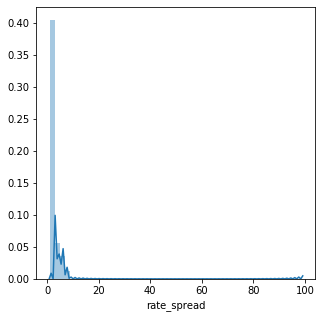

In [13]:
# Checking distribution
plt.figure(figsize=(5,5))
sns.distplot(Train['rate_spread']);

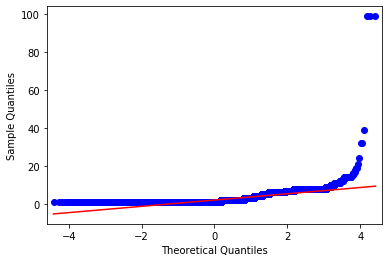

In [14]:
from statsmodels.graphics.gofplots import qqplot

# q-q plot
qqplot(Train['rate_spread'], line='s')
plt.show()

In [15]:
from scipy.stats import anderson

# normality test
result = anderson(Train['rate_spread'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 26028.493
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


### **Independent features**

#### **Categorical features**

In [16]:
# Function for checking total unique values
def unique_count(data, cols):
  for col in cols:
    count = len(data[col].unique())
    print("Total number of Unique value in " + col + " :", count)

var_list = Train.drop(['rate_spread'], axis = 1).columns.tolist()
unique_count(Train, var_list)

Total number of Unique value in row_id : 200000
Total number of Unique value in loan_type : 4
Total number of Unique value in property_type : 3
Total number of Unique value in loan_purpose : 3
Total number of Unique value in occupancy : 3
Total number of Unique value in loan_amount : 1397
Total number of Unique value in preapproval : 3
Total number of Unique value in msa_md : 409
Total number of Unique value in state_code : 53
Total number of Unique value in county_code : 306
Total number of Unique value in applicant_ethnicity : 4
Total number of Unique value in applicant_race : 7
Total number of Unique value in applicant_sex : 4
Total number of Unique value in applicant_income : 1040
Total number of Unique value in population : 14316
Total number of Unique value in minority_population_pct : 76423
Total number of Unique value in ffiecmedian_family_income : 49434
Total number of Unique value in tract_to_msa_md_income_pct : 44423
Total number of Unique value in number_of_owner-occupied_u

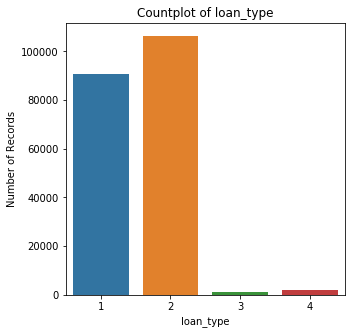

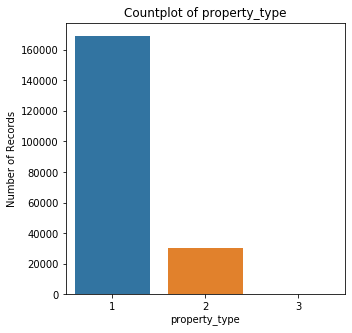

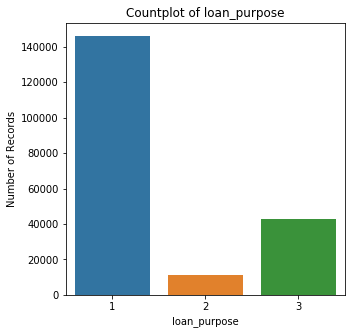

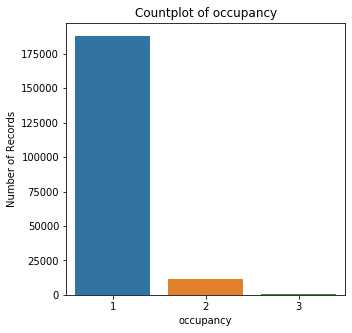

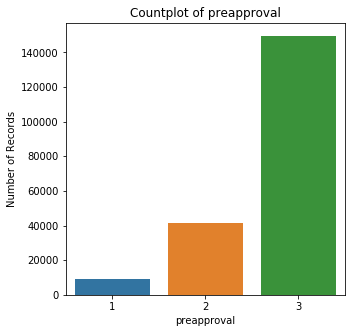

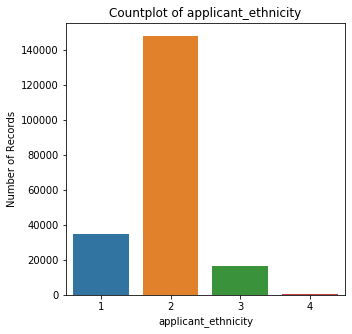

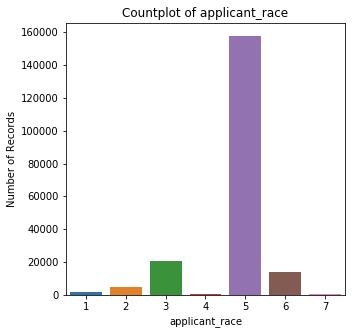

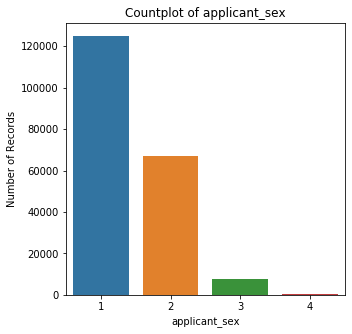

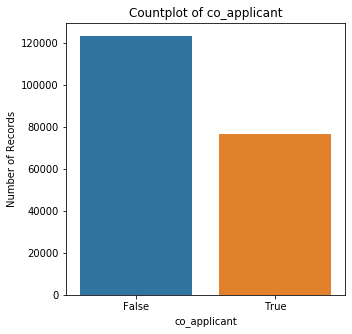

In [17]:
# Function for Countplot
def count_plot(data, cols):
  for col in cols:
    fig = plt.figure(figsize=(5,5)) # define plot area
    ax = fig.gca() # define axis    
    sns.countplot(Train[col], ax = ax)
    #Train[col].plot.hist(ax = ax, bins = bins) # Use the plot.hist method on subset of the data frame
    ax.set_title('Countplot of ' + col) # Give the plot a main title
    ax.set_xlabel(col) # Set text for the x axis
    ax.set_ylabel('Number of Records')# Set text for y axis
    plt.show()

cat_cols = ['loan_type','property_type','loan_purpose','occupancy','preapproval','applicant_ethnicity','applicant_race','applicant_sex','co_applicant']

count_plot(Train, cat_cols)

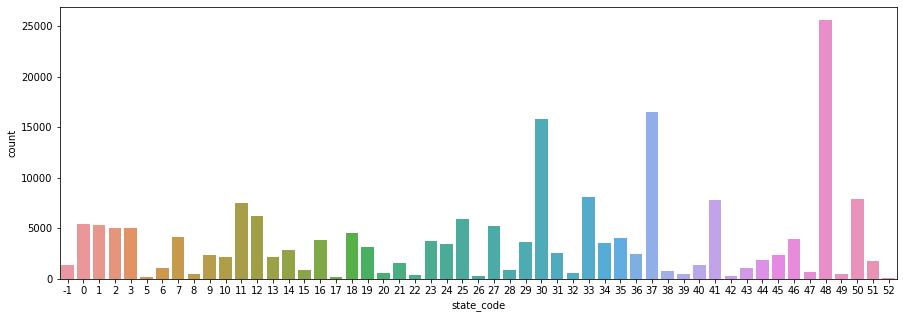

In [18]:
plt.figure(figsize=(15,5))
sns.countplot(Train['state_code']);

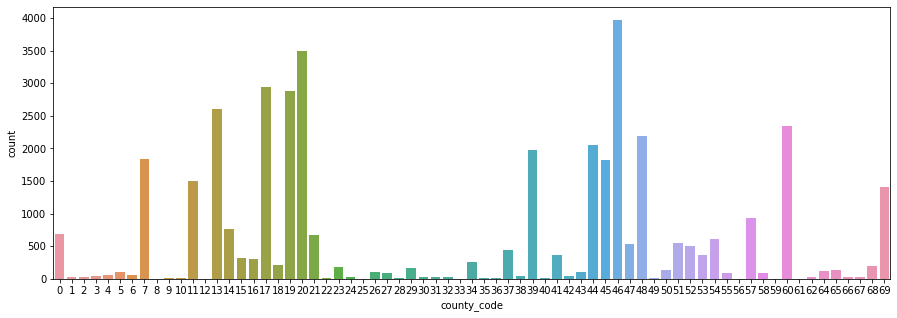

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(Train[Train['county_code'] < 70]['county_code']);

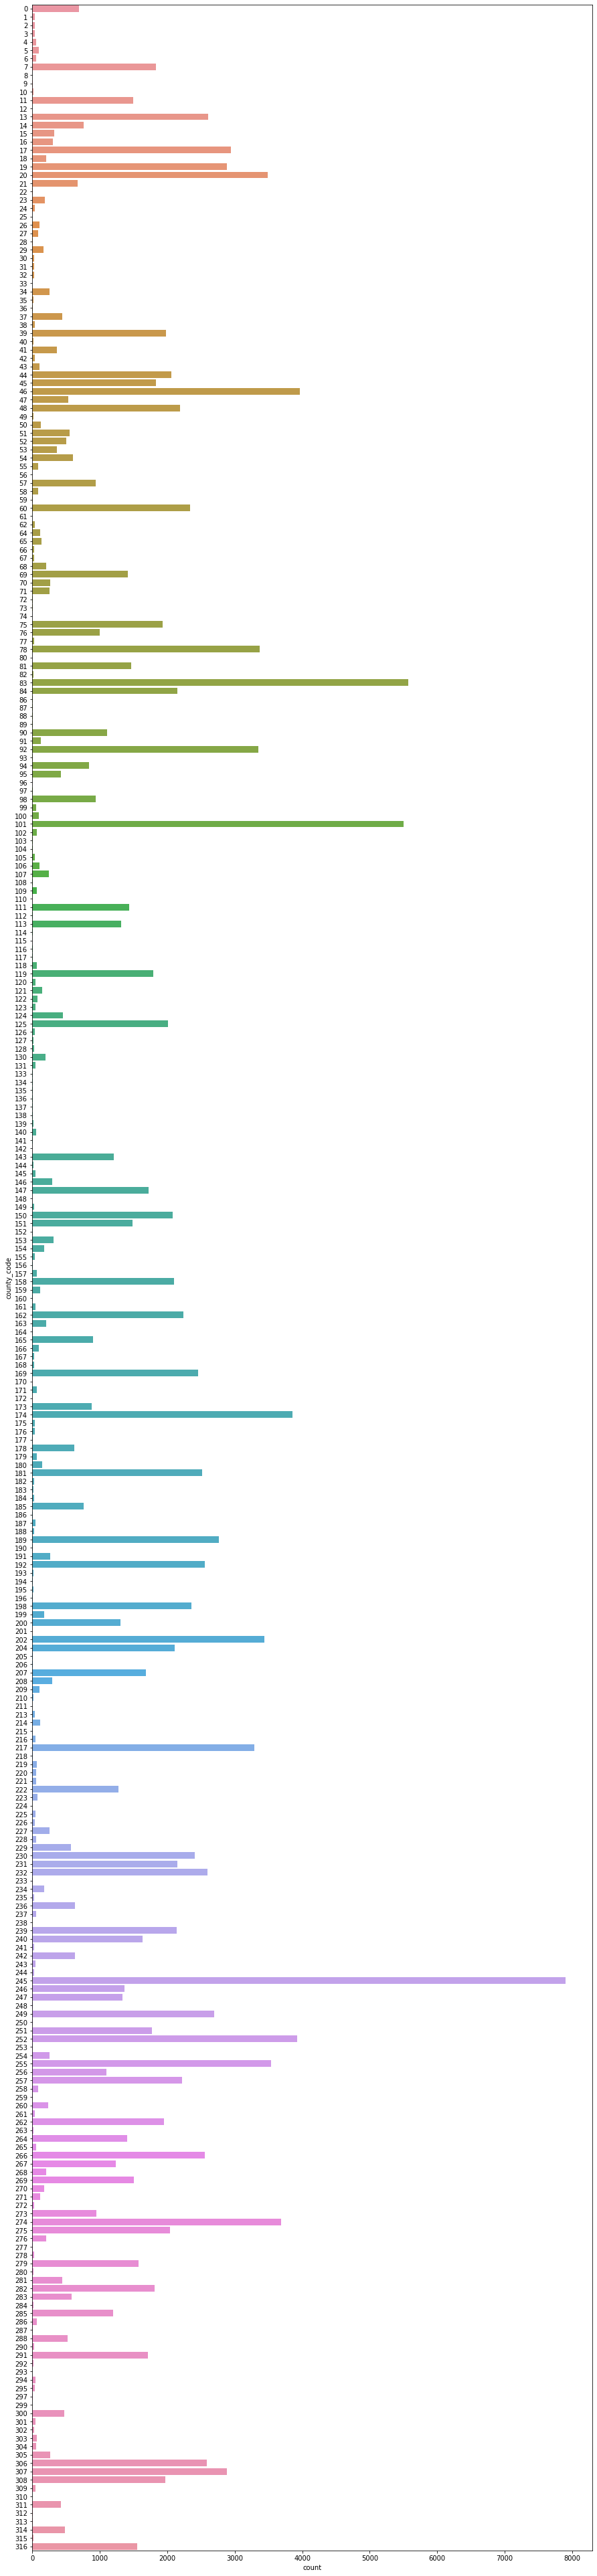

In [20]:
plt.figure(figsize=(15,70))
sns.countplot(y = Train['county_code']);

#### **Continuous features**

In [21]:
num_cols = ['loan_amount','applicant_income','population','minority_population_pct','ffiecmedian_family_income','tract_to_msa_md_income_pct',
            'number_of_owner-occupied_units','number_of_1_to_4_family_units','lender', 'msa_md']
Train[num_cols].describe()

,loan_amount,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,msa_md
count,200000.000000,189292.000000,198005.000000,198005.000000,198015.000000,197977.000000,197988.000000,197984.000000,200000.000000,200000.000000
mean,142.574940,73.617902,5391.099099,34.238640,64595.355801,89.283022,1402.872401,1927.336618,2001.311505,226.974970
std,142.559487,105.696934,2669.028807,27.930882,12724.514485,15.059223,706.880410,886.576586,1271.134197,106.655259
min,1.000000,1.000000,7.000000,0.326000,17860.000000,6.193000,3.000000,6.000000,0.000000,0.000000
25%,67.000000,39.000000,3717.000000,10.928000,56654.000000,81.648000,932.000000,1344.000000,963.000000,154.000000
50%,116.000000,56.000000,4959.000000,25.996000,63485.000000,98.959000,1304.000000,1799.000000,1834.000000,261.000000
75%,179.000000,83.000000,6470.000000,52.000000,71238.000000,100.000000,1742.000000,2353.000000,3180.000000,318.000000
max,11104.000000,10042.000000,34126.000000,100.000000,125095.000000,100.000000,8747.000000,13615.000000,4283.000000,408.000000


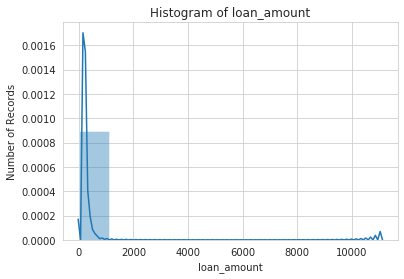

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


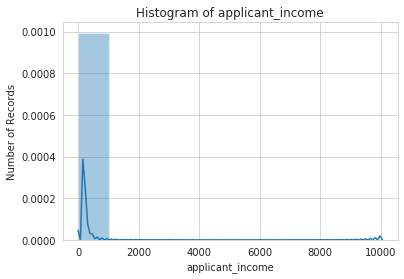

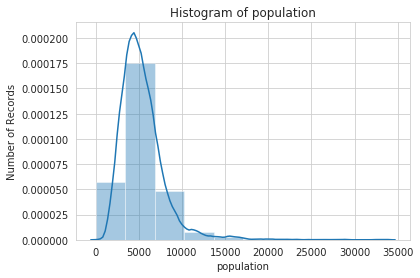

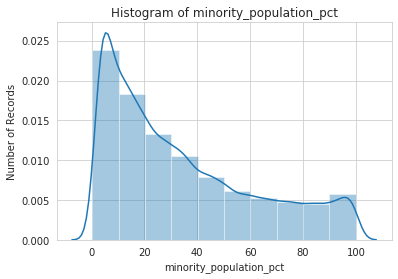

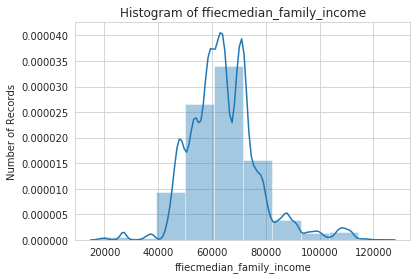

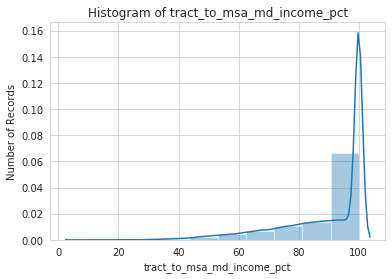

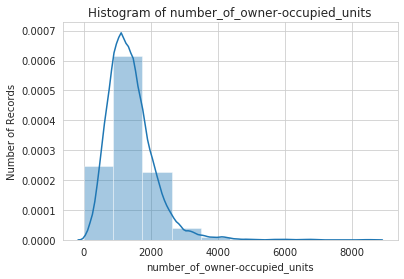

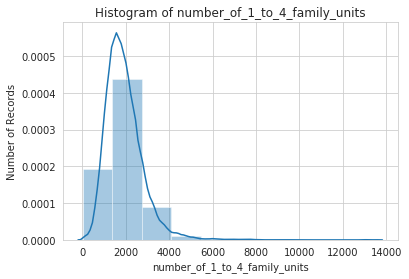

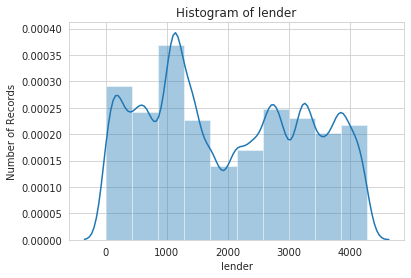

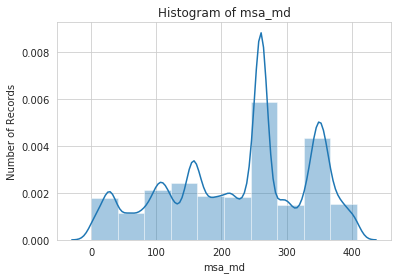

In [22]:
def plot_histogram(Train, cols, bins = 10):
    for col in cols:
      sns.set_style("whitegrid")
      sns.distplot(Train[col], bins = bins, rug=False, hist = True)
      plt.title('Histogram of ' + col) # Give the plot a main title
      plt.xlabel(col) # Set text for the x axis
      plt.ylabel('Number of Records')# Set text for y axis
      plt.show();
    
plot_histogram(Train, num_cols)

## **3.4 Bivariate analysis**

### **Categorical features Vs Target**

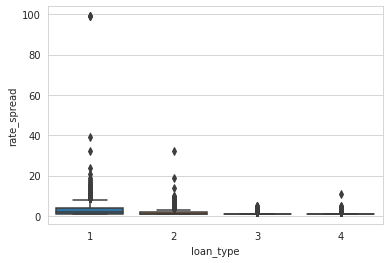

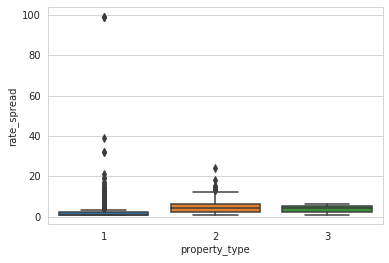

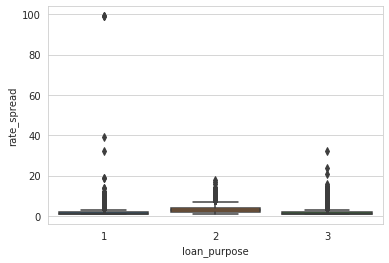

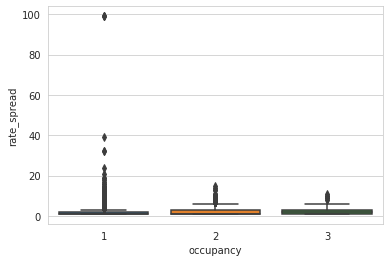

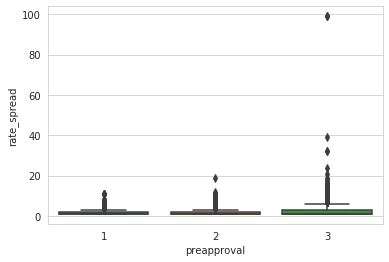

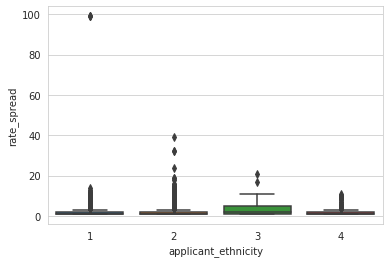

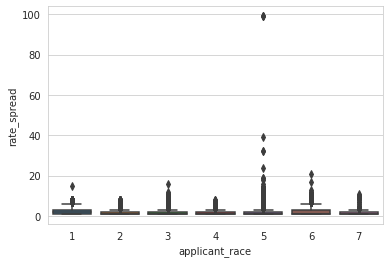

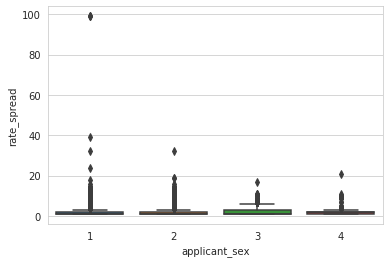

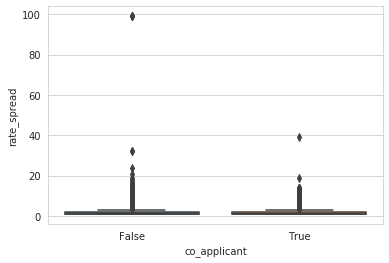

In [23]:
def plot_box(Train, cols, col_y = 'rate_spread'):
    for col in cols:
      sns.set_style("whitegrid")
      sns.boxplot(col, col_y, data=Train)
      plt.xlabel(col) # Set text for the x axis
      plt.ylabel(col_y)# Set text for y axis
      plt.show()
        
plot_box(Train, cat_cols)    

### **Numerical features Vs Target**

#### **Scatter plot**

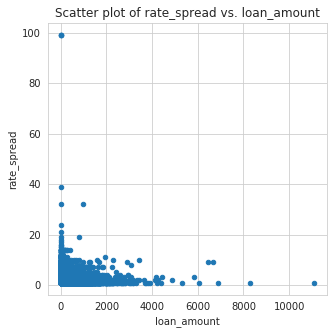

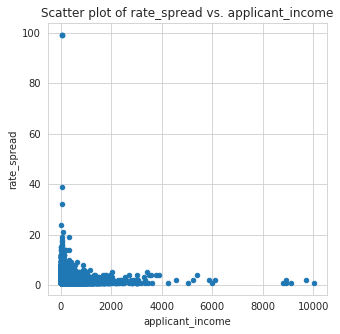

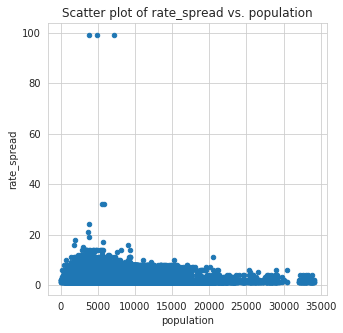

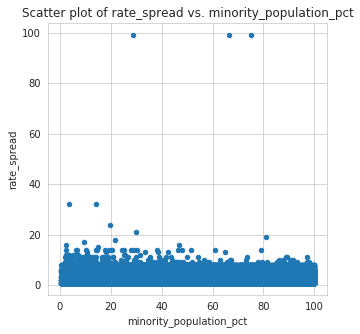

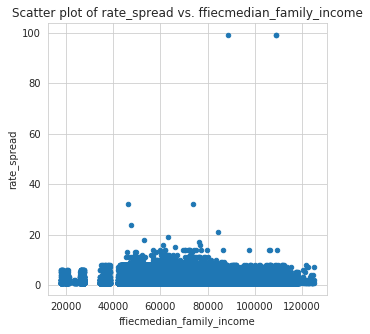

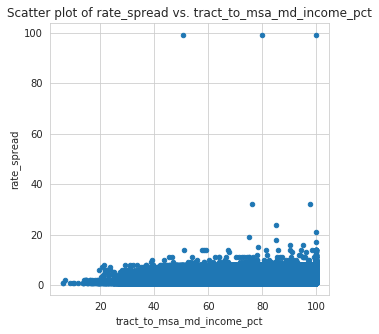

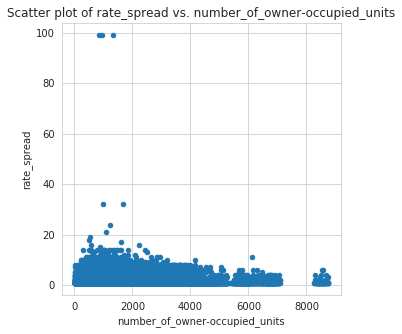

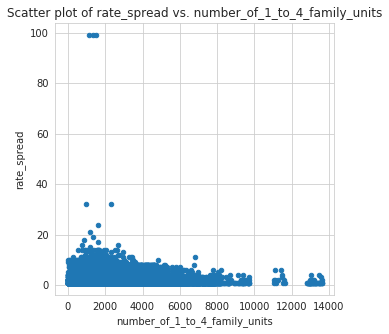

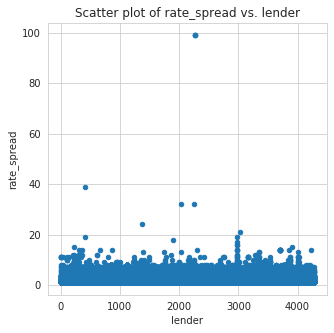

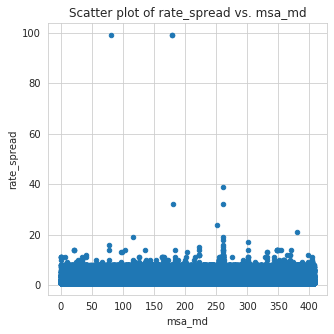

In [24]:
def plot_scatter(Train, cols, col_y = 'rate_spread'):
    for col in cols:
        fig = plt.figure(figsize=(5,5)) # define plot area
        ax = fig.gca() # define axis   
        Train.plot.scatter(x = col, y = col_y, ax = ax)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y
                     )# Set text for y axis
        plt.show()

plot_scatter(Train, num_cols)        

In [25]:
num_cols[-1] = 'rate_spread'
num_cols

['loan_amount',
 'applicant_income',
 'population',
 'minority_population_pct',
 'ffiecmedian_family_income',
 'tract_to_msa_md_income_pct',
 'number_of_owner-occupied_units',
 'number_of_1_to_4_family_units',
 'lender',
 'rate_spread']

#### **Corrleation analysis**

In [26]:
corr = Train[num_cols].corr()
corr

,loan_amount,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,rate_spread
loan_amount,1.000000,0.446577,0.061305,0.094808,0.236394,0.104496,0.019172,-0.032762,0.060012,-0.218168
applicant_income,0.446577,1.000000,0.013113,-0.026194,0.087916,0.087541,0.022140,0.000246,0.039898,-0.020662
population,0.061305,0.013113,1.000000,0.131649,0.025885,0.156227,0.855972,0.837463,-0.010737,-0.034157
minority_population_pct,0.094808,-0.026194,0.131649,1.000000,0.038890,-0.414876,-0.184161,-0.132240,-0.004273,-0.076955
ffiecmedian_family_income,0.236394,0.087916,0.025885,0.038890,1.000000,-0.132305,0.006683,-0.106964,0.011279,-0.084964
tract_to_msa_md_income_pct,0.104496,0.087541,0.156227,-0.414876,-0.132305,1.000000,0.369782,0.229319,0.009992,0.010798
number_of_owner-occupied_units,0.019172,0.022140,0.855972,-0.184161,0.006683,0.369782,1.000000,0.905214,-0.008748,0.004927
number_of_1_to_4_family_units,-0.032762,0.000246,0.837463,-0.132240,-0.106964,0.229319,0.905214,1.000000,-0.007126,0.020661
lender,0.060012,0.039898,-0.010737,-0.004273,0.011279,0.009992,-0.008748,-0.007126,1.000000,-0.112019
rate_spread,-0.218168,-0.020662,-0.034157,-0.076955,-0.084964,0.010798,0.004927,0.020661,-0.112019,1.000000


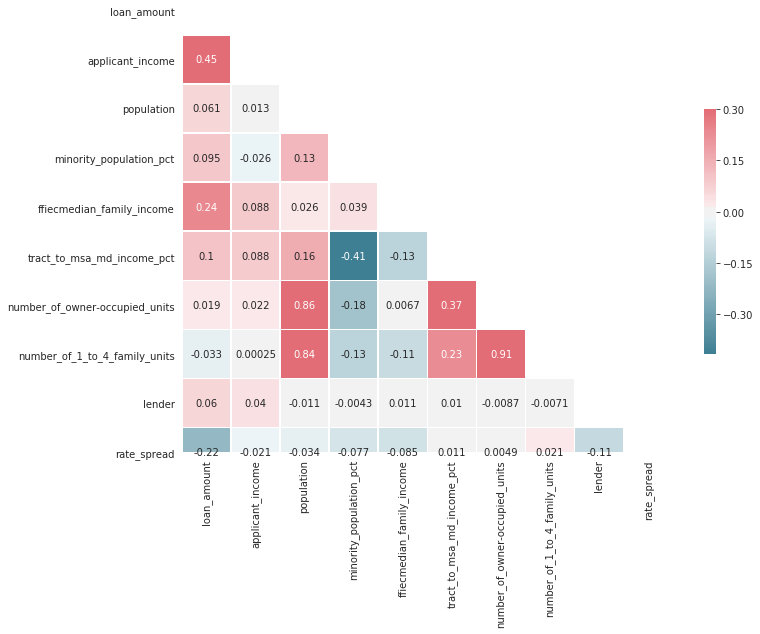

In [27]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});


#### **Pair plot**

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


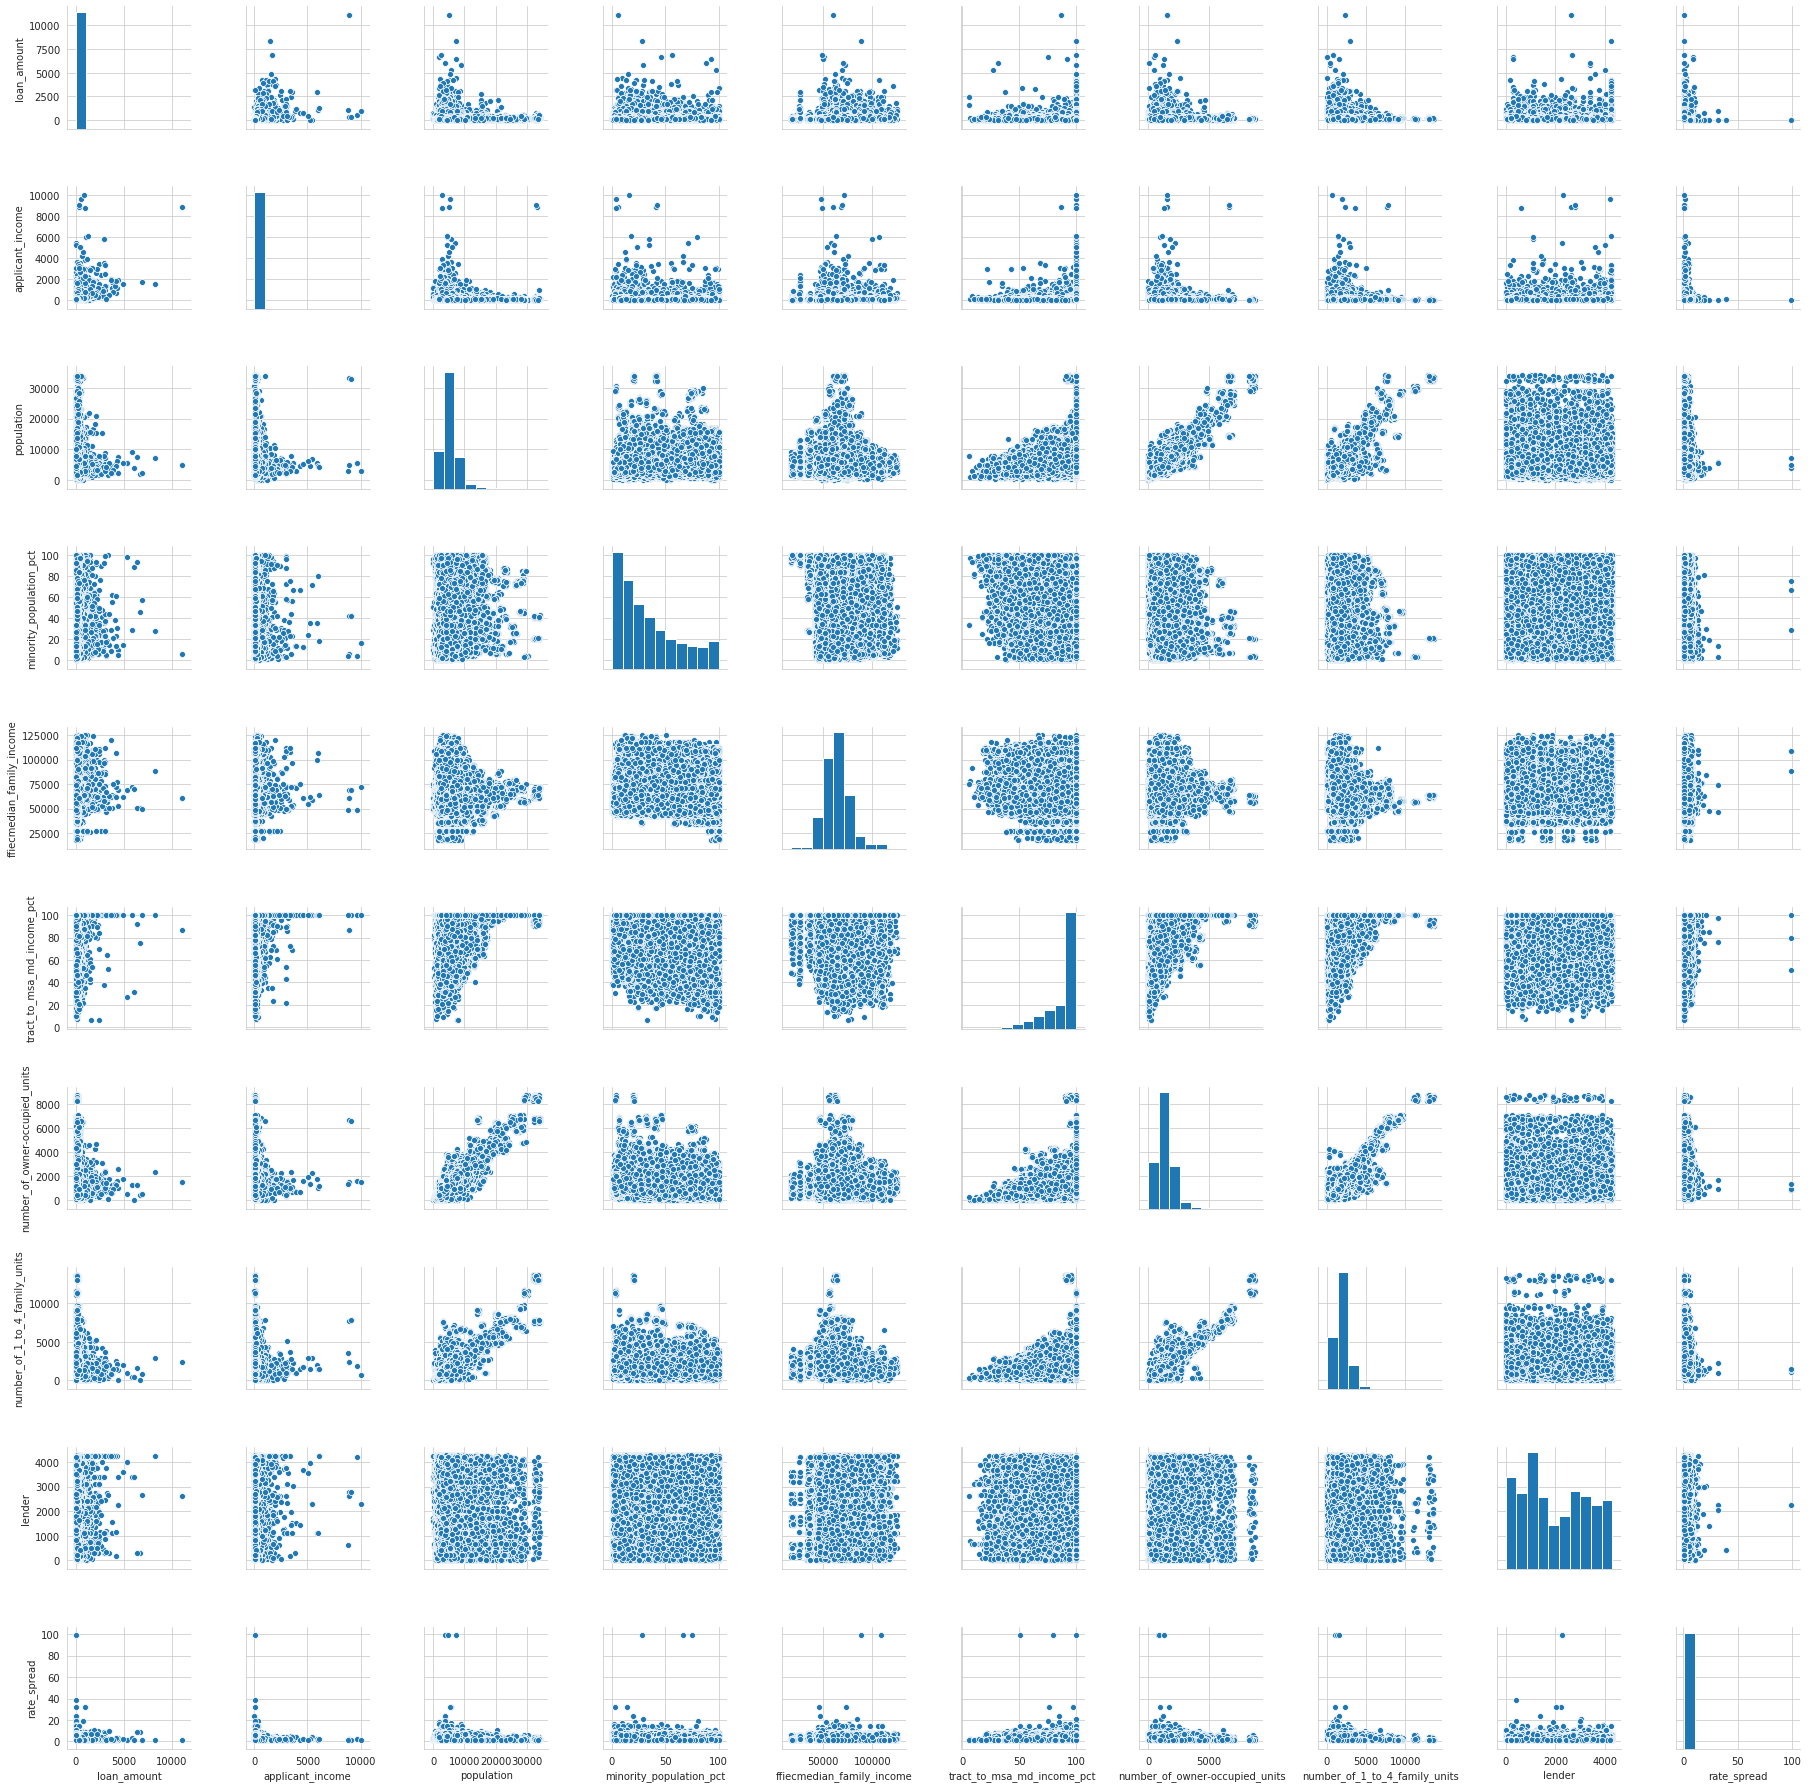

In [28]:
sns.pairplot(Train[num_cols]);